<a href="https://colab.research.google.com/github/AlexandreBourrieau/ML/blob/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/India_NRJ/Selection_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

# Chargement des données

In [1]:
!wget --no-check-certificate --content-disposition "https://raw.githubusercontent.com/AlexandreBourrieau/ML/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/data/India_NRJ.csv"

--2021-05-10 16:45:51--  https://raw.githubusercontent.com/AlexandreBourrieau/ML/main/Carnets%20Jupyter/S%C3%A9ries%20temporelles/data/India_NRJ.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 745922 (728K) [text/plain]
Saving to: ‘India_NRJ.csv’

India_NRJ.csv       100%[===================>] 728.44K   849KB/s    in 0.9s    

2021-05-10 16:45:52 (849 KB/s) - ‘India_NRJ.csv’ saved [745922/745922]



In [6]:
df_data = pd.read_csv("India_NRJ.csv")
df_data

,Date,Purchase Bid (MW),Sell Bid (MW),MCV (MW),Cleared Volume (MW),Finale Scheduled Volume (MW),MCP (Rs/MWh)
0,2020-01-01 00:00:00,5225.8,20520.9,4828.60,4828.60,4828.60,2049.01
1,2020-01-01 00:15:00,5256.0,21183.2,4858.80,4858.80,4858.80,2029.46
2,2020-01-01 00:30:00,5183.3,22123.8,4786.20,4786.20,4786.20,2018.48
3,2020-01-01 00:45:00,5186.7,22804.6,4869.48,4869.48,4869.48,2000.04
4,2020-01-01 01:00:00,4915.1,24342.8,4610.60,4610.60,4610.60,1999.09
...,...,...,...,...,...,...,...
11611,2020-04-30 22:45:00,9743.7,10427.4,8644.60,8644.60,8644.60,3153.00
11612,2020-04-30 23:00:00,9606.0,10367.4,8492.50,8492.50,8492.50,2799.98
11613,2020-04-30 23:15:00,9397.0,10524.4,8483.50,8483.50,8483.50,2799.90
11614,2020-04-30 23:30:00,9153.0,10636.4,8314.70,8314.70,8314.70,2700.50


# Identification des variables importantes par Random Forest

**1. Création des dataset X et Y**

In [8]:
X = df_data
X = X.drop(columns=['MCP (Rs/MWh)','Date'])
Xdrop = SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(X)
Xdrop = pd.DataFrame(Xdrop)
Xdrop.columns =X.columns
X = Xdrop
X

,Purchase Bid (MW),Sell Bid (MW),MCV (MW),Cleared Volume (MW),Finale Scheduled Volume (MW)
0,5225.8,20520.9,4828.60,4828.60,4828.60
1,5256.0,21183.2,4858.80,4858.80,4858.80
2,5183.3,22123.8,4786.20,4786.20,4786.20
3,5186.7,22804.6,4869.48,4869.48,4869.48
4,4915.1,24342.8,4610.60,4610.60,4610.60
...,...,...,...,...,...
11611,9743.7,10427.4,8644.60,8644.60,8644.60
11612,9606.0,10367.4,8492.50,8492.50,8492.50
11613,9397.0,10524.4,8483.50,8483.50,8483.50
11614,9153.0,10636.4,8314.70,8314.70,8314.70


In [10]:
y = df_data.iloc[:,6:7]
y

,MCP (Rs/MWh)
0,2049.01
1,2029.46
2,2018.48
3,2000.04
4,1999.09
...,...
11611,3153.00
11612,2799.98
11613,2799.90
11614,2700.50


In [11]:
X.to_csv("India_X.csv")
y.to_csv("India_Y.csv")

**2. Choix des paramètres : Nombre d'arbres**

In [21]:
# Informations sur les données
n = 11616              # Nombre d'observations
p = 5                  # Nombre de variables

n_arbres_max = 20

n_arbres = np.linspace(1,n_arbres_max,10).astype(np.int32)
mtry = np.sqrt(p).astype(np.int32)
OOB_err = []

for i in n_arbres:
  print("#Arbres : %d" %i)
  clf = RandomForestRegressor(n_estimators=i, bootstrap=True, oob_score=True, max_samples = n, max_features = mtry, n_jobs=-1)
  clf.fit(X.iloc[:,0:5],tf.squeeze(np.asarray(y),1))
  OOB_err.append(1 - clf.oob_score_)

#Arbres : 1
#Arbres : 3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


#Arbres : 5


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


#Arbres : 7


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


#Arbres : 9


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


#Arbres : 11


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


#Arbres : 13


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


#Arbres : 15


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


#Arbres : 17


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


#Arbres : 20


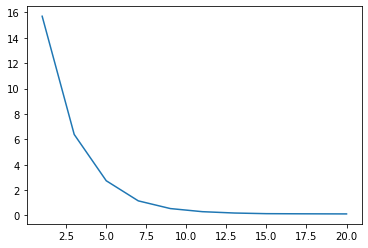

In [22]:
plt.plot(n_arbres,OOB_err)

**3. Choix des paramètres : valeur de mtry**

In [25]:
# Informations sur les données
n = 11616             # Nombre d'observations
p = 5               # Nombre de variables

n_arbres = 30
mtry_0 = (np.sqrt(p)/2).astype(np.int32)

m_try = np.linspace(mtry_0,p,10).astype(np.int32)

OOB_err = []

for i in m_try:
   print("mtry = %s" %i)
   clf = RandomForestRegressor(n_estimators=n_arbres, bootstrap=True, oob_score=True, max_features=i, n_jobs=-1)
   clf.fit(X.iloc[:,0:5],tf.squeeze(np.asarray(y),1))
   OOB_err.append(1 - clf.oob_score_)

mtry = 1
mtry = 1
mtry = 1
mtry = 2
mtry = 2
mtry = 3
mtry = 3
mtry = 4
mtry = 4
mtry = 5


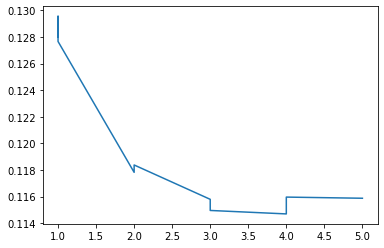

In [26]:
plt.plot(m_try,OOB_err)

**4. Première méthode : Importance sans permutations**

In [27]:
from sklearn.inspection import permutation_importance

# Informations sur les données
n = 11616             # Nombre d'observations
p = 5                 # Nombre de variables
n_arbres = 30
m_try = p

clf = RandomForestRegressor(n_estimators=n_arbres, bootstrap=True, oob_score=True, max_features=m_try, n_jobs=-1)
clf.fit(X.iloc[:,0:5],tf.squeeze(np.asarray(y),1))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
col_sorted_by_importance=clf.feature_importances_.argsort()
feat_imp = pd.DataFrame({'cols':X.iloc[:,0:5].columns[col_sorted_by_importance],'imps':clf.feature_importances_[col_sorted_by_importance]})
feat_imp

,cols,imps
0,Cleared Volume (MW),0.017977
1,Finale Scheduled Volume (MW),0.018409
2,MCV (MW),0.021111
3,Sell Bid (MW),0.170798
4,Purchase Bid (MW),0.771704


In [29]:
!pip install plotly_express --upgrade -q

In [30]:
import plotly_express as px
import plotly.offline as po

px.bar(feat_imp.sort_values(['imps'], ascending=False)[:30], x='cols', y='imps', labels={'cols':'column', 'imps':'feature importance'})

**5. Deuxième méthode : Avec permutations**

Permutation importance is a technique where we shuffle the values of a single column and run the model to see how the scores get affected. If the scores are affected greatly, then the feature is highly important to the model and if not, it does not add significant value to the model.

Let us see the feature importances for recall score on the test dataset.

In [31]:
import random

def PermImportance(X, y, clf, metric, num_iterations=100):
    '''
    Calculates the permutation importance of features in a dataset.
    Inputs:
    X: dataframe with all the features
    y: array-like sequence of labels
    clf: sklearn classifier, already trained on training data
    num_iterations: no. of repetitive runs of the permutation
    Outputs:
    baseline: the baseline metric without any of the columns permutated
    scores: differences in baseline metric caused by permutation of each feature, dict in the format {feature:[diffs]}
    '''
    bar=progressbar.ProgressBar(max_value=len(X.columns))
    baseline_metric=clf.score(X,y)
    scores={c:[] for c in X.columns}
    for c in X.columns:
        X1=X.copy(deep=True)
        for _ in range(num_iterations):
            temp=X1[c].tolist()
            random.shuffle(temp)
            X1[c]=temp
            score = clf.score(X1,y)
            scores[c].append(baseline_metric-score)
        bar.update(X.columns.tolist().index(c))
    return baseline_metric, scores

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import progressbar

baseline, scores = PermImportance(X.iloc[:,0:5], tf.squeeze(np.asarray(y),1), clf, recall_score, num_iterations=10)

 80% (4 of 5) |####################      | Elapsed Time: 0:00:04 ETA:   0:00:01

In [33]:
percent_changes={c:[] for c in X.columns}
for c in scores:
    for i in range(len(scores[c])):
        percent_changes[c].append(scores[c][i]/baseline*100)

In [35]:
pd.DataFrame.from_dict(percent_changes).melt().groupby(['variable']).mean().reset_index().sort_values(['value'], ascending=False)

,variable,value
3,Purchase Bid (MW),152.776045
4,Sell Bid (MW),49.797876
2,MCV (MW),4.996326
1,Finale Scheduled Volume (MW),3.793388
0,Cleared Volume (MW),3.568138


In [36]:
px.bar(
    pd.DataFrame.from_dict(percent_changes).melt().groupby(['variable']).mean().reset_index().sort_values(['value'], ascending=False)[:25], 
    x='variable',y='value',labels={'variable':'column','value':'% change in recall'})

**6. Comparaison des deux méthodes précédentes**

In [37]:
# Calcul des écarts-types et des moyennes
scores_std = {}
scores_mean = {}
for element in scores:
  scores_std[element] = np.std(scores[element])
  scores_mean[element] = np.mean(scores[element])

df_perm = pd.DataFrame.from_dict([scores_std, scores_mean]).transpose()
df_perm = df_perm.rename(columns={0:"std",1:"mean"})
df_perm = df_perm.sort_values(by=['mean'],ascending=False)
df_perm

,std,mean
Purchase Bid (MW),0.006909,1.502994
Sell Bid (MW),0.005107,0.489906
MCV (MW),0.000501,0.049153
Finale Scheduled Volume (MW),0.000338,0.037319
Cleared Volume (MW),0.000298,0.035103


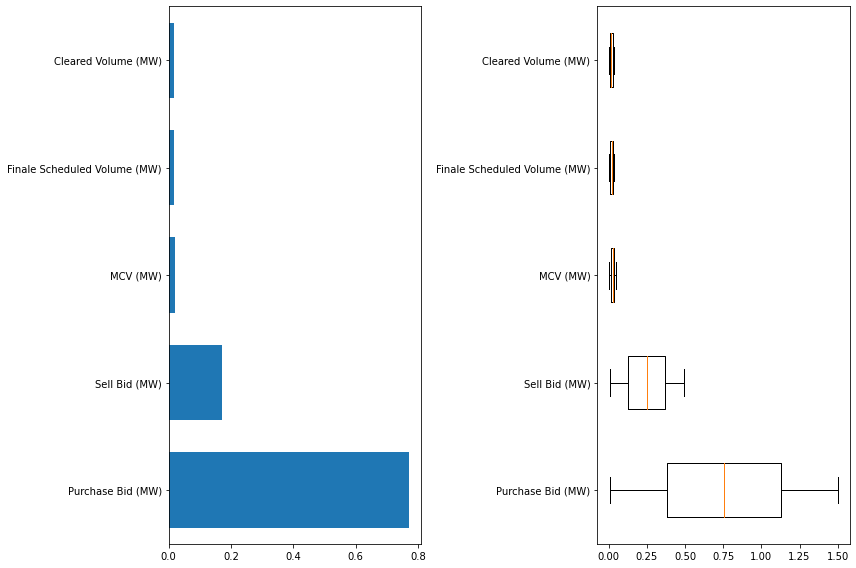

In [38]:
feature_perm = df_perm[0:30]
feature_imp = feat_imp.sort_values(['imps'],ascending=False)
feature_imp = feature_imp[0:30]

tree_indices = np.arange(0, len(feature_imp)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.barh(tree_indices,feature_imp['imps'].values, height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(feature_imp['cols'].values)
ax1.set_ylim((0, len(feature_imp)))

ax2.boxplot(feature_perm, vert=False,labels=feature_perm.index.values)
fig.tight_layout()
plt.show()

**7. Sélection par la méthode RFE-CV**

Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.

In [46]:
from sklearn.feature_selection import RFECV

# Informations sur les données
n = 11616             # Nombre d'observations
p = 5              # Nombre de variables
n_arbres = 300
m_try = p

clf = RandomForestRegressor(n_estimators=n_arbres, bootstrap=True, oob_score=True, max_features="auto", n_jobs=-1)
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='neg_mean_absolute_error',min_features_to_select=1, verbose=1)
rfecv.fit(X.iloc[:,0:5], tf.squeeze(np.asarray(y),1))

Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 5 features.


RFECV(cv=5,
      estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=300, n_jobs=-1,
                                      oob_score=True, random_state=None,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_absolute_error',
      step=1, verbose=1)

Optimal number of features : 4


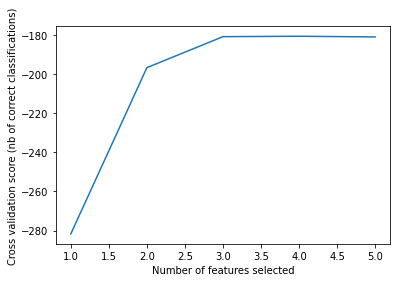

In [47]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,len(rfecv.grid_scores_) + 1),rfecv.grid_scores_)
plt.show()

In [48]:
rfecv.ranking_

array([1, 1, 1, 2, 1])

**8. Sélection avec le module VSURF sous R**

**9. Création des données finales et analyses**

In [58]:
data_finales = df_data.iloc[:,1:4]
data_finales

,Purchase Bid (MW),Sell Bid (MW),MCV (MW)
0,5225.8,20520.9,4828.60
1,5256.0,21183.2,4858.80
2,5183.3,22123.8,4786.20
3,5186.7,22804.6,4869.48
4,4915.1,24342.8,4610.60
...,...,...,...
11611,9743.7,10427.4,8644.60
11612,9606.0,10367.4,8492.50
11613,9397.0,10524.4,8483.50
11614,9153.0,10636.4,8314.70


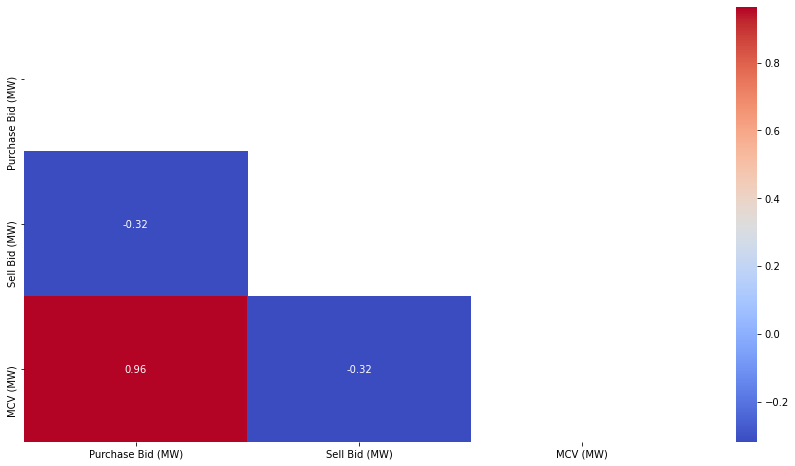

In [59]:
corr = data_finales.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(corr,mask=mask, cmap='coolwarm',annot=True, fmt='.2f')